In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def load_data(dataset_choice):
    datasets = [
        r"../input/datasets-for-regression/Realestate/Realestate.csv",
        r"../input/datasets-for-regression/Bank_Customer_Churn_Prediction/Bank_Customer_Churn_Prediction.csv"
    ]

    if dataset_choice == 1:
        df = pd.read_csv(datasets[0], header=None, delimiter=",")
        df = df.drop(0, axis=1)
        features = df.iloc[1:, 0:6]
        labels = df.iloc[1:, -1]
    elif dataset_choice == 2:
        df = pd.read_csv(datasets[1], header=None, delimiter=",")
        df = df.drop(0, axis=1)
        df = df.drop(1, axis=1)
        features = df.iloc[1:, 1:10]
        labels = df.iloc[1:, -1]
    
    return (features, labels)

In [3]:
def split_data(features, labels):
    total_samples = features.shape[0]
    test_split_size = int(np.ceil((30 / 100) * total_samples))
    
    train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size = test_split_size)

    train_x = train_x.reset_index(drop = True)
    test_x = test_x.reset_index(drop = True)
    train_y = train_y.reset_index(drop = True)
    test_y = test_y.reset_index(drop = True)
    
    train_y = train_y.astype(float)
    test_y = test_y.astype(float)

    for column in range(1, 7):
        train_x[column] = train_x[column].astype(float)
        test_x[column] = test_x[column].astype(float)

    return (train_x, test_x, train_y, test_y)

In [4]:
def h_function(features, weights, bias):
    y_hat = np.dot(weights, features.T)
    y_hat += bias
    return y_hat

In [5]:
def cost_function(y, y_hat, total_samples):
    error = y - y_hat
    squared_error = np.power(error, 2)
    squared_errors = np.sum(squared_error)
    total_samples *= 2
    cost = 1 / total_samples * squared_errors
    return cost

In [6]:
def gradient_descent_weights(samples, train_f, y, y_hat):
    diff = y_hat - y
    dl_dw = np.dot(train_f.T, diff)
    dl_dw = (2 / samples) * dl_dw
    return dl_dw

In [7]:
def gradient_descent_bias(samples, y, y_hat):
    diff = np.sum(y_hat - y)
    dl_db = (2 / samples) * diff
    return dl_db

In [8]:
def plot_data(train_costs, test_costs, epochs):
    plt.plot(epochs, train_costs, 'g', label = "Training Cost")
    plt.plot(epochs, test_costs, 'r', label = "Testing Cost")
    plt.legend()
    plt.show()

In [9]:
def evaluate(weights, bias, test_f, test_l):
    y_hat = h_function(test_f, weights, bias)
    cost = cost_function(test_l, y_hat, test_f.shape[0])
    return cost

In [10]:
features, labels = load_data(1)
train_f, test_f, train_l, test_l = split_data(features, labels)

In [11]:
lr = 0.00000001
epochs = 10000
weights = np.array([0.1, 0.3, 0.3, 0.1, 0.3, 0.2])
bias = 1

total_train_samples = train_f.shape[0]

Train Cost after 9999 epcohs is 63.9041890442679
Final Test Cost is 63.30248252230207


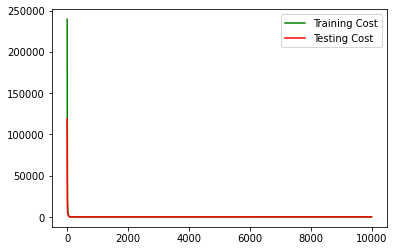

In [12]:
train_costs = []
test_costs = []
epochs_list = []

for i in range(epochs):
    y_hat = h_function(train_f, weights, bias)
    train_cost = cost_function(train_l, y_hat, total_train_samples)
    
    # Update Weights 
    dl_dw = gradient_descent_weights(total_train_samples, train_f, train_l, y_hat)
    weights = weights - lr * dl_dw
    
    # Update Bias
    dl_db = gradient_descent_bias(total_train_samples, train_l, y_hat)
    bias = bias - lr * dl_db
    
    train_costs.append(train_cost)
    test_cost = evaluate(weights, bias, test_f, test_l)
    test_costs.append(test_cost)
    epochs_list.append(i)
    
    if i == (epochs - 1):
        print(f"Train Cost after {i} epcohs is {train_cost}")
        print(f"Final Test Cost is {test_cost}")

plot_data(train_costs, test_costs, epochs_list)

In [13]:
def preprocess_data(features):
    pass

In [14]:
# features, labels = load_data(2)
# print(features)
# print()
# print(labels)
# train_f, test_f, train_l, test_l = split_data(features, labels)